In [83]:
import os, ast, json, uuid, re
import numpy as np
import pandas as pd
import geopandas

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
print(pio.renderers)

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



In [23]:
pd.set_option('display.max_columns', None)
sns.set_theme()

In [2]:
# path for work place
csv_path = "C:/Users/user/Downloads/dist-rep-wran-ampcode-v4.csv"

In [4]:
df = pd.read_csv(csv_path)

In [6]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [76]:
df

,ReportDisburseNarcoticBeYear,ReportDisburseNarcoticMonth,ProductTypeName,MonthlyReportNarcoticName,MonthlyReportNarcoticBalanceForwardValue,MonthlyReportNarcoticReceiveValue,MonthlyReportNarcoticPaidValue,MonthlyReportNarcoticRemainValue,ReferCustomerName,CustomerAddressProvinceName,CustomerTypeName,ReportDisburseNarcoticRecordType,CreateDateTime,ReportDisburseNarcoticRequestorName,SendReportDate,uuid_x,uuid_y,fullAddress,formatted_address,location_type,place_id,lat,lng,types,zip_code,district_name,amp_code,report_ce_year
0,2567.0,1,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablets 0.25 mg (Polipharm),1829.0,0.0,500.0,1329.0,โรงพยาบาล ศรีประจันต์,สุพรรณบุรี,สถานพยาบาลของรัฐ,RECORD,16/03/2024 14:43 น.,นางสาว สมัชญา บุญขวัญดี,2024-03-16,ddb6e8dd-53a5-44c4-b727-df5d5884e7f8,ddb6e8dd-53a5-44c4-b727-df5d5884e7f8,218 ถนนสุพรรณบุรี-ชัยนาถ แขวงวังน้ำซับ เขตศรีป...,"218 สุพรรณบุรี - ชัยนาท Tambon Si Prachan, Amp...",ROOFTOP,ChIJ7dkWP78k4jAR5xZD6aeOngA,14.641639,100.149439,"premise,street_address",72140,ศรีประจันต์,7205,2024-01-31
1,2567.0,1,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablets 0.5 mg (Polipharm),500.0,0.0,0.0,500.0,คลินิกเวชกรรมด็อกเตอร์ป่าตองวรเวช,ภูเก็ต,คลินิก,RECORD,14/03/2024 9:08 น.,นางสาว จริยา บัวศรี,2024-03-14,efd5c13a-af08-46be-8591-843fec8306a9,82862aaa-36cd-40fc-9c51-222b2401a4b5,47/14-15 ถนนราษฎร์อุทิศ 200 ปี ตำบลป่าตอง อำเภ...,"Rat Uthit Song Roi Pi Rd, Tambon Patong, Ampho...",GEOMETRIC_CENTER,ChIJc_7cxrw6UDARWxKMiwN1tDQ,7.894495,98.298619,route,83150,กะทู้,8302,2024-01-31
2,2567.0,1,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablets 0.5 mg (Polipharm),1889.0,0.0,612.0,1277.0,โรงพยาบาลซานคามิลโลโรงพยาบาลทั่วไปขนาดใหญ่,ราชบุรี,โรงพยาบาลเอกชน,RECORD,28/02/2024 13:12 น.,นางสาว จริยา บัวศรี,2024-02-28,aa40eacf-4e16-489f-bf4b-bba34bd86944,15666bbc-9341-40ae-b42b-c489288a7503,31 ถนนอุดมพิทยา ตำบลสวนกล้วย อำเภอบ้านโป่ง ราช...,"31 Soi Udum Pitthaya Khang Rong Rian Hok Heng,...",RANGE_INTERPOLATED,EnUzMSBTb2kgVWR1bSBQaXR0aGF5YSBLaGFuZyBSb25nIF...,13.813480,99.875546,street_address,70110,บ้านโป่ง,7005,2024-01-31
3,2567.0,1,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablets 0.25 mg (Polipharm),310.0,2000.0,465.0,1845.0,โรงพยาบาล บางปะกอก 3 โรงพยาบาลทั่วไปขนาดใหญ่,สมุทรปราการ,โรงพยาบาลเอกชน,RECORD,16/02/2024 9:24 น.,นางสาว จริยา บัวศรี,2024-02-16,e5062c3e-861b-44df-9fd6-459e62272db1,e5062c3e-861b-44df-9fd6-459e62272db1,27/14 หมู่ 10 ถนนสุขสวัสดิ์ แขวงบางครุ เขตพระป...,"Thanon Suk Sawat, Thailand",GEOMETRIC_CENTER,ChIJ73Yei16h4jARTTUpslTDs5A,13.622237,100.539377,route,10130,พระประแดง,1104,2024-01-31
4,2567.0,1,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablets 0.5 mg (Polipharm),754.0,3000.0,957.0,797.0,โรงพยาบาล บางปะกอก 3 โรงพยาบาลทั่วไปขนาดใหญ่,สมุทรปราการ,โรงพยาบาลเอกชน,RECORD,16/02/2024 9:24 น.,นางสาว จริยา บัวศรี,2024-02-16,f84ad883-2bea-4b36-ae4d-0c0059ee6697,e5062c3e-861b-44df-9fd6-459e62272db1,27/14 หมู่ 10 ถนนสุขสวัสดิ์ แขวงบางครุ เขตพระป...,"Thanon Suk Sawat, Thailand",GEOMETRIC_CENTER,ChIJ73Yei16h4jARTTUpslTDs5A,13.622237,100.539377,route,10130,พระประแดง,1104,2024-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28174,2567.0,12,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablet 1.0 mg (Polipharm) (100 tab/...,949.0,0.0,342.0,607.0,หมอกิ๊ฟลันสหคลินิก,นราธิวาส,คลินิก,ONLINE,10/01/2025 15:26 น.,นางสาว อารีนา หะยีวาเงาะ,2025-01-10,2ae8194a-7022-4837-88b3-9baaab86a58e,9551310e-ba2a-48c8-8f68-14f680585379,354/23 ถนนระแงะมรรคา ตำบลบางนาค อำเภอเมืองนราธ...,"354 Thanon Rangae Makkha, Tambon Bang Nak, Amp...",ROOFTOP,ChIJ8aQTNLzxszERwF2-kBj0C_A,6.412776,101.823887,street_address,96000,เมืองนราธิวาส,9601,2024-12-31
28175,2567.0,12,(วจ. 2) วัตถุออกฤทธิ์ในประเภท 2,Alprazolam tablet 1.0 mg (Polipharm) (100 tab/...,949.0,0.0,342.0,607.0,หมอกิ๊ฟลันสหคลินิก,นราธิวาส,คลินิก,ONLINE,10/01/2025 15:26 น.,นางสาว อารีนา หะยีวาเงาะ,2025-01-10,2ae8194a-7022-4837-88b3-9baaab86a58e,d5ca07fe-e5b9-46b9-aeae-e2b3a69552d7,354/23 ถนนระแงะมรรคา ตำบลบางนาค อำเภอเมืองนราธ

In [63]:
df['report_ce_year'] = df['ReportDisburseNarcoticBeYear']-543

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28179 entries, 0 to 28178
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   ReportDisburseNarcoticBeYear              28179 non-null  float64       
 1   ReportDisburseNarcoticMonth               28179 non-null  float64       
 2   ProductTypeName                           28179 non-null  object        
 3   MonthlyReportNarcoticName                 28179 non-null  object        
 4   MonthlyReportNarcoticBalanceForwardValue  28179 non-null  float64       
 5   MonthlyReportNarcoticReceiveValue         28179 non-null  float64       
 6   MonthlyReportNarcoticPaidValue            28179 non-null  float64       
 7   MonthlyReportNarcoticRemainValue          28179 non-null  float64       
 8   ReferCustomerName                         28179 non-null  object        
 9   CustomerAddressProvinceName 

In [64]:
df['report_ce_year'] = df['report_ce_year'].round(0).astype(int).astype(str)

In [66]:
df['ReportDisburseNarcoticMonth'] = df['ReportDisburseNarcoticMonth'].round(0).astype(int).astype(str)

In [68]:
df['report_ce_year'] = df['report_ce_year'] + '-' + df['ReportDisburseNarcoticMonth']

In [70]:
df['report_ce_year'] = pd.to_datetime(df['report_ce_year'], format='%Y-%m')

In [72]:
df['report_ce_year']

0       2024-01-01
1       2024-01-01
2       2024-01-01
3       2024-01-01
4       2024-01-01
           ...    
28174   2024-12-01
28175   2024-12-01
28176   2024-12-01
28177   2024-12-01
28178   2024-12-01
Name: report_ce_year, Length: 28179, dtype: datetime64[ns]

In [75]:
df['report_ce_year'] = df['report_ce_year'] + pd.offsets.MonthEnd(0)
df['report_ce_year']

0       2024-01-31
1       2024-01-31
2       2024-01-31
3       2024-01-31
4       2024-01-31
           ...    
28174   2024-12-31
28175   2024-12-31
28176   2024-12-31
28177   2024-12-31
28178   2024-12-31
Name: report_ce_year, Length: 28179, dtype: datetime64[ns]

In [54]:
df['SendReportDate'] = pd.to_datetime(df['SendReportDate'])

In [55]:
df['SendReportDate'].min()

Timestamp('2024-01-29 00:00:00')

In [56]:
df['SendReportDate'].max()

Timestamp('2025-06-05 00:00:00')

In [43]:
sum_paid_df = df.groupby(by=['MonthlyReportNarcoticName'])['MonthlyReportNarcoticPaidValue'].sum().reset_index().sort_values(by=['MonthlyReportNarcoticPaidValue'],ascending=False)

In [44]:
sum_paid_df

,MonthlyReportNarcoticName,MonthlyReportNarcoticPaidValue
3,Alprazolam tablets 0.5 mg (Polipharm),15814979.0
0,Alprazolam tablet 1.0 mg (Polipharm) (100 tab/...,8448290.0
1,Alprazolam tablets 0.25 mg (Polipharm),7918225.5
4,Alprazolam tablets 1 mg (Pharmasant),1241.0
2,Alprazolam tablets 0.5 mg (Pharmasant),359.0


In [45]:
ct_df = df['MonthlyReportNarcoticName'].value_counts().reset_index()

In [46]:
ct_df.sum()

MonthlyReportNarcoticName    Alprazolam tablets 0.5 mg (Polipharm)Alprazola...
count                                                                    28179
dtype: object

In [47]:
merge1 = sum_paid_df.merge(
    ct_df,
    how = 'left',
    left_on = ['MonthlyReportNarcoticName'],
    right_on = ['MonthlyReportNarcoticName'],
    validate = '1:1'
)

In [48]:
merge1

,MonthlyReportNarcoticName,MonthlyReportNarcoticPaidValue,count
0,Alprazolam tablets 0.5 mg (Polipharm),15814979.0,12179
1,Alprazolam tablet 1.0 mg (Polipharm) (100 tab/...,8448290.0,6996
2,Alprazolam tablets 0.25 mg (Polipharm),7918225.5,8278
3,Alprazolam tablets 1 mg (Pharmasant),1241.0,570
4,Alprazolam tablets 0.5 mg (Pharmasant),359.0,156


In [49]:
merge1['customer_name_ctd'] = np.nan

In [50]:
for i,v in merge1.iterrows():
    nn = v['MonthlyReportNarcoticName']
    nunique = df.loc[df['MonthlyReportNarcoticName'] == nn]['ReferCustomerName'].nunique()
    merge1.loc[i, 'customer_name_ctd'] = nunique

In [51]:
merge1

,MonthlyReportNarcoticName,MonthlyReportNarcoticPaidValue,count,customer_name_ctd
0,Alprazolam tablets 0.5 mg (Polipharm),15814979.0,12179,1056.0
1,Alprazolam tablet 1.0 mg (Polipharm) (100 tab/...,8448290.0,6996,606.0
2,Alprazolam tablets 0.25 mg (Polipharm),7918225.5,8278,724.0
3,Alprazolam tablets 1 mg (Pharmasant),1241.0,570,48.0
4,Alprazolam tablets 0.5 mg (Pharmasant),359.0,156,13.0


In [52]:
merge1.to_csv("C:/Users/user/Downloads/dist-rep-wran-ampcode-v4.csv")

In [27]:
recordtype_df = df['ReportDisburseNarcoticRecordType'].value_counts().reset_index()

In [28]:
recordtype_df

,ReportDisburseNarcoticRecordType,count
0,RECORD,18336
1,ONLINE,9843


<h1>Plot pie chart Alprazolam distribution reports by record types</h1>

In [36]:
fig = px.pie(
    recordtype_df,
    values= 'count',
    names='ReportDisburseNarcoticRecordType',
    title = 'Alprazolam distribution reports by record types'
)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=30)
fig.show()

<h1>Plot time-series chart with send report date vs. month report date(ce)</h1>

In [78]:
sum_paid_ts = df.groupby(by = ['report_ce_year'])['MonthlyReportNarcoticPaidValue'].sum()

In [80]:
sum_paid_ts = sum_paid_ts.reset_index()

In [94]:
sum_paid_ts

,report_ce_year,MonthlyReportNarcoticPaidValue
0,2024-01-31,2829715.0
1,2024-02-29,2769744.5
2,2024-03-31,2857537.0
3,2024-04-30,2734795.0
4,2024-05-31,2763570.0
5,2024-06-30,2641433.0
6,2024-07-31,2691836.5
7,2024-08-31,2642512.0
8,2024-09-30,2412434.5
9,2024-10-31,2661542.5


In [95]:
sum_paid_ts.rename(columns={"MonthlyReportNarcoticPaidValue", "value"})

TypeError: 'set' object is not callable

In [90]:
ct_ts = df['report_ce_year'].value_counts().reset_index()

In [91]:
ct_ts

,report_ce_year,count
0,2024-05-31,2376
1,2024-03-31,2374
2,2024-02-29,2372
3,2024-06-30,2370
4,2024-01-31,2365
5,2024-04-30,2365
6,2024-08-31,2365
7,2024-07-31,2358
8,2024-09-30,2344
9,2024-10-31,2335


In [85]:
pio.renderers.default = "jupyterlab"

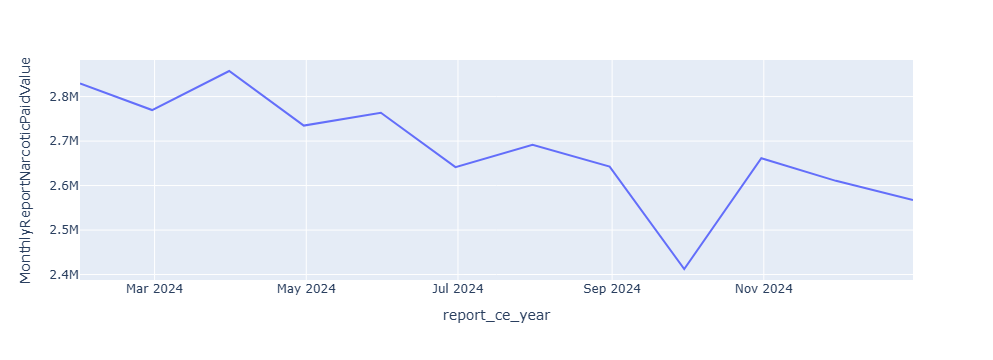

In [86]:
fig = px.line(
    sum_paid_ts,
    x = "report_ce_year",
    y = "MonthlyReportNarcoticPaidValue"
)
fig.show()

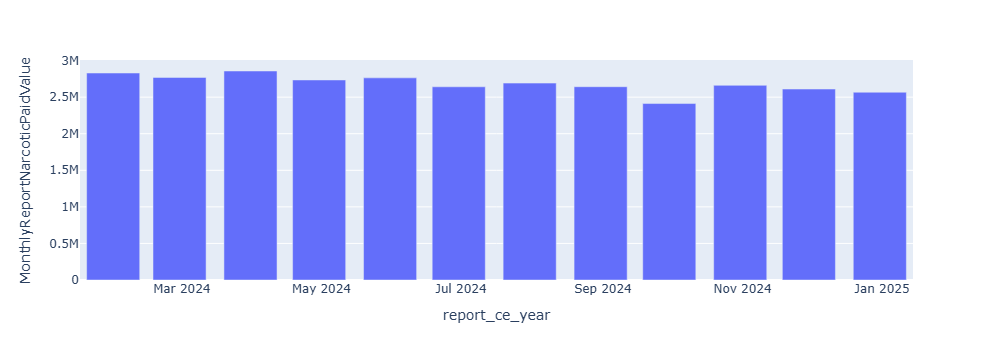

In [87]:
fig = px.bar(
    sum_paid_ts,
    x = "report_ce_year",
    y = "MonthlyReportNarcoticPaidValue"
)
fig.show()